# <font color="green"> Library Imports </font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import IFrame, Image

In [2]:
# Visualizar todas as colunas de dataframes

pd.set_option('display.max_columns', 500)

# <font color="green"> Helper functions </font>

# <font color="green"> Demanda </font>

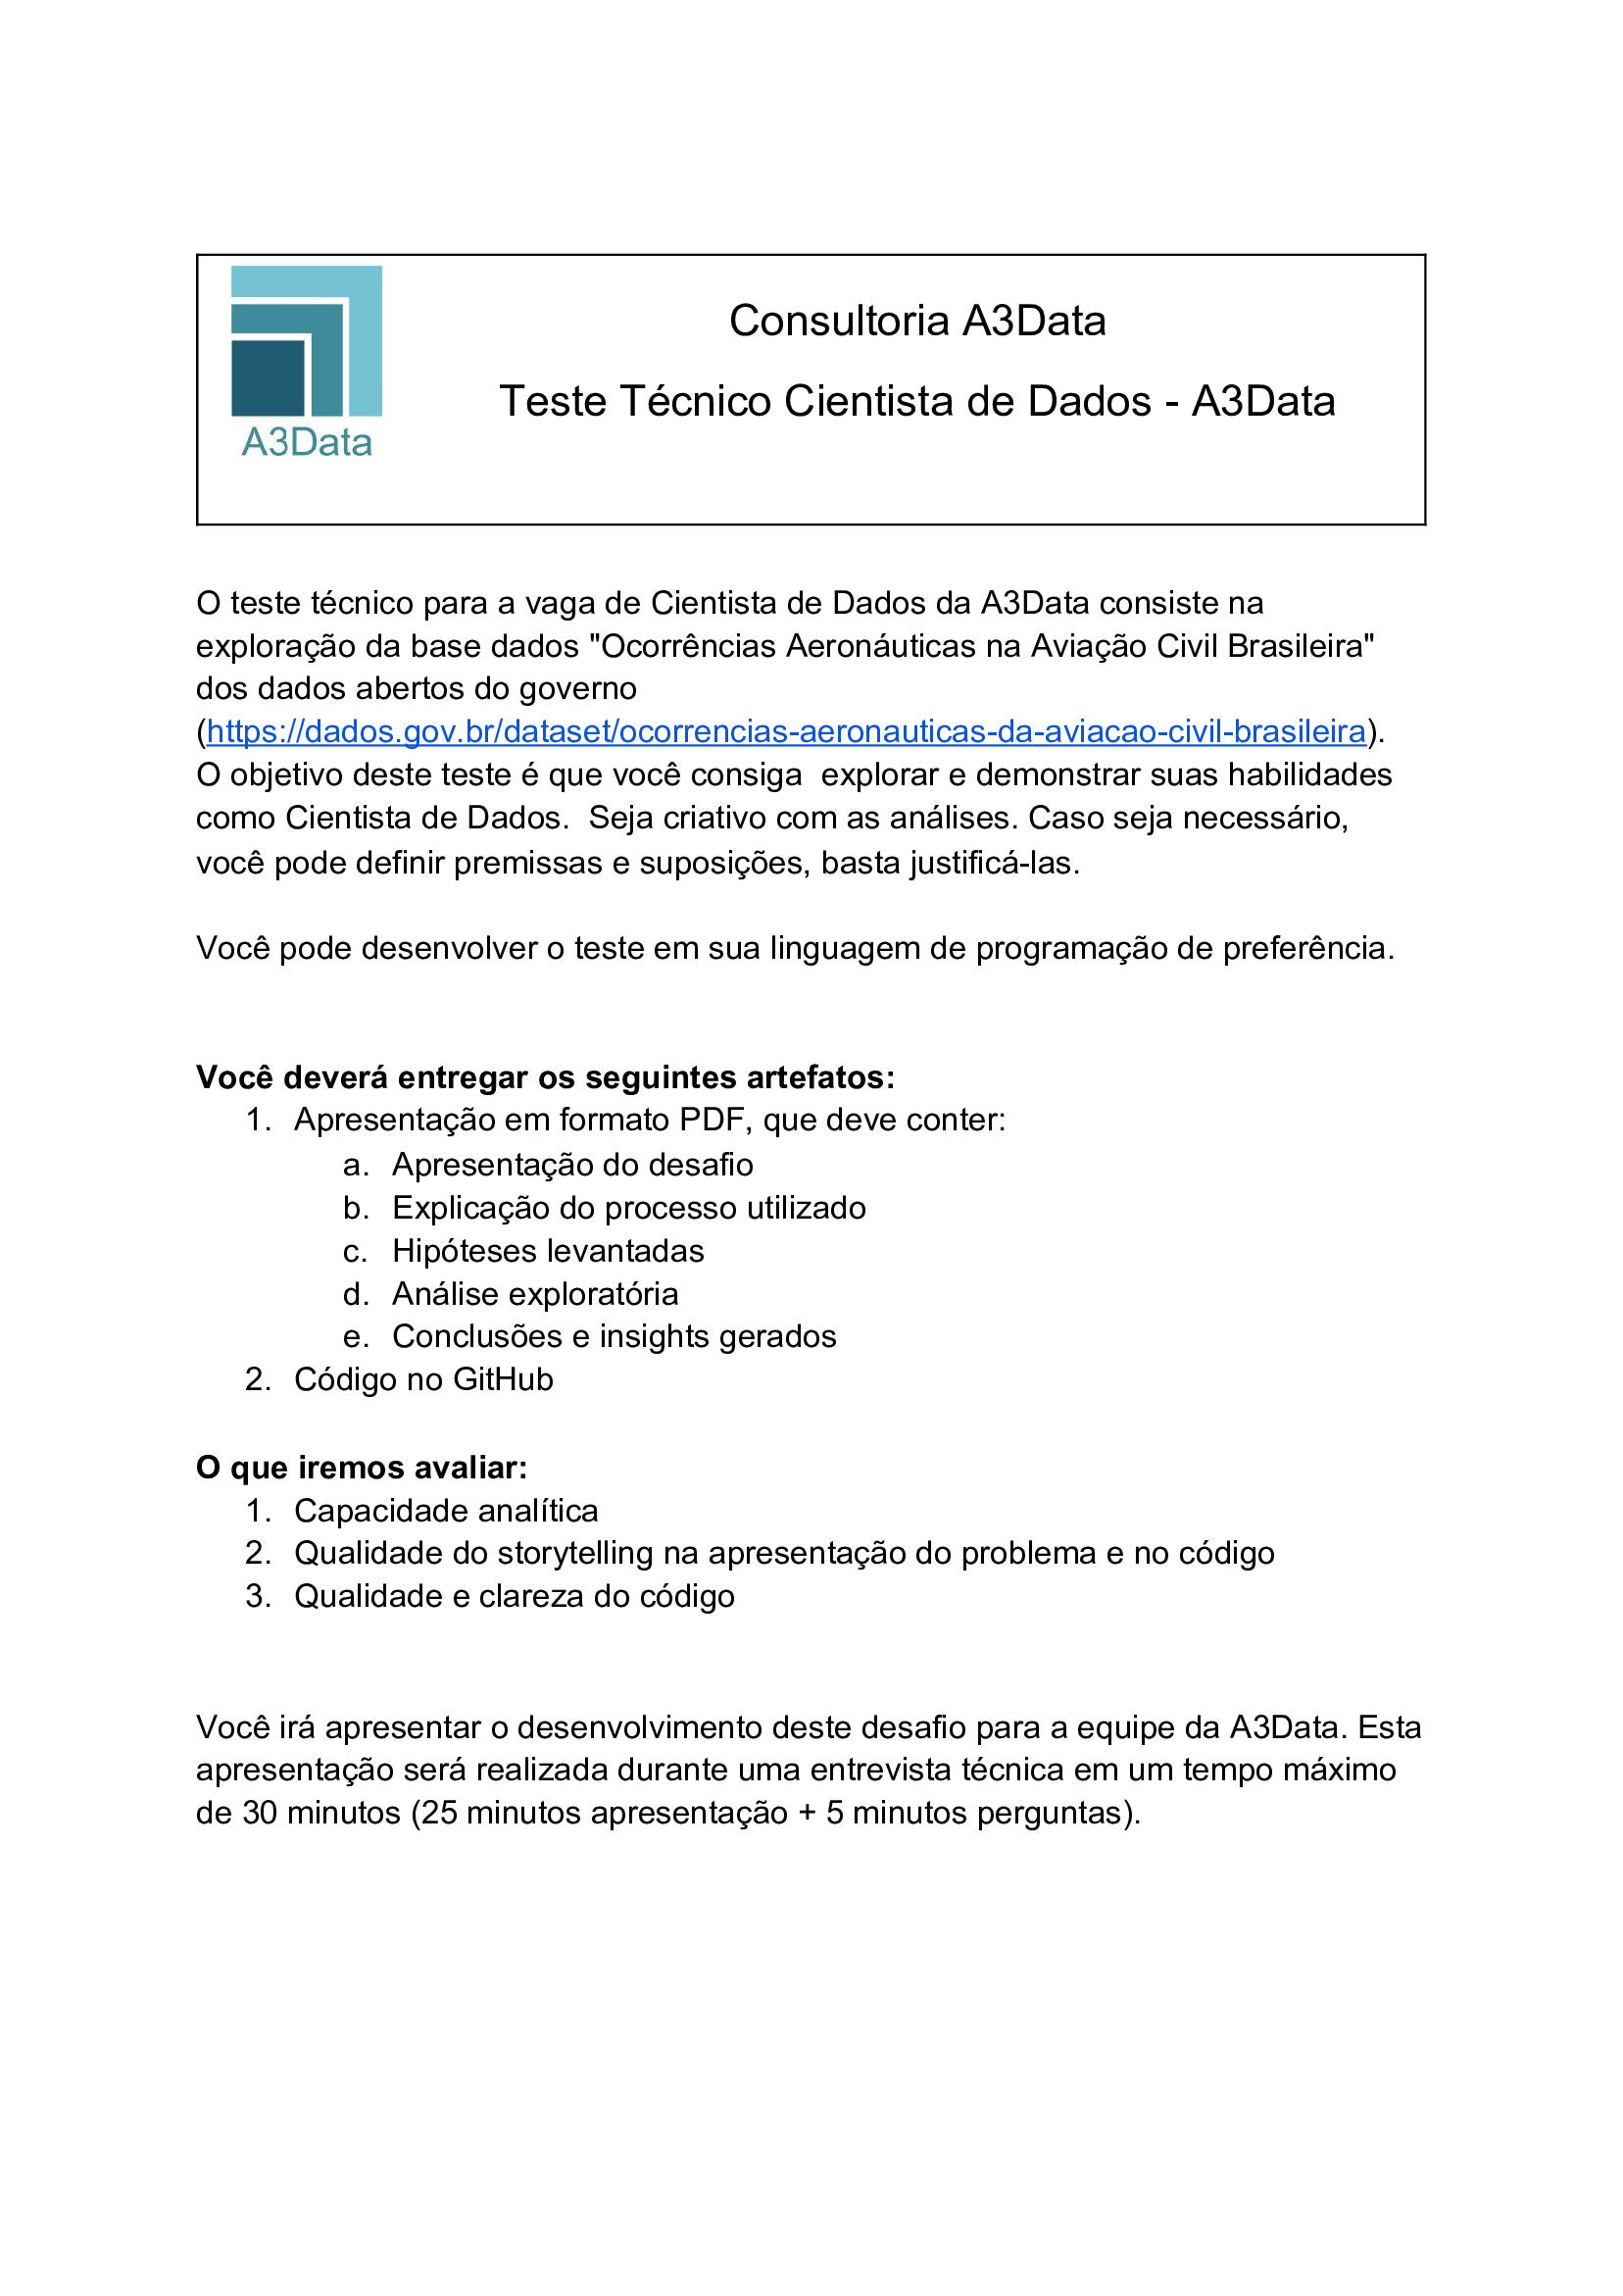

In [132]:
Image(filename='desafio_tcnico_cd_-_a3data.png')

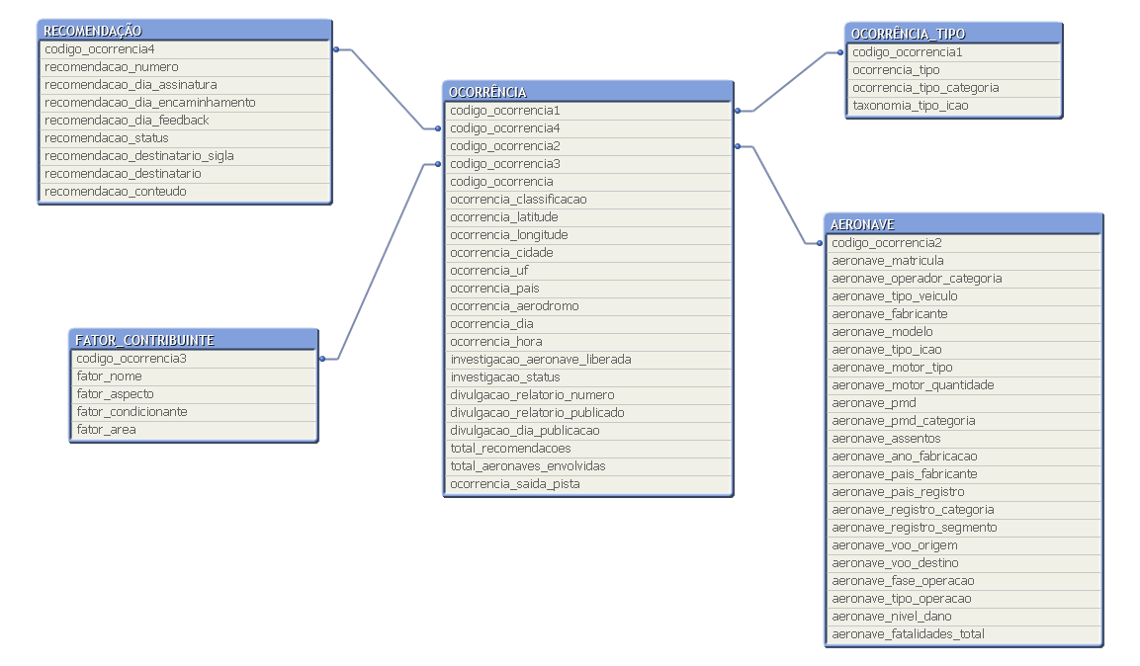

In [4]:
# Relacionamento entre as tabelas

Image(filename='modelo_dados.png')

-Planejamento da solução:

O que será feito no âmbito do desenvolvimento desta solução:

- Avaliação do dataset e seu correspondente contexto do problema
- Definir as respectivas tabelas e colunas a serem usadas (muitas tabelas e muitas colunas, fechar o escopo)
- Fazer a únião das tabelas
- Tratamento de NA's
- Levantar hipóteses para guiar a construção dos gráficos (muitos gráficos podem ser construídos, fechar o escopo tentando levantar perguntas que possam gerar respostas relevantes)
- Realizar a exploração dos dados guiada pelas hipóteses levantadas
- Encerrar com insights e conclusões

O que NÃO será feito no âmbito do desenvolvimento desta solução:

- Treinamento e aplicação de modelos de machine learning

# 1.0 Data import and basic inspection

## <font color="gray"> 1.1 Data loading</font>

In [130]:
# Data loading

tabela_ocorrencia = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/ocorrencia.csv', delimiter=';')

tabela_ocorrencia_tipo = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/ocorrencia_tipo.csv', delimiter=';')

tabela_aeronave = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/aeronave.csv', delimiter=';')

tabela_fator_contribuinte = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/fator_contribuinte.csv', delimiter=';')

tabela_recomendacao = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/recomendacao.csv', delimiter=';')

## <font color="gray"> 1.2 Selecting columns and merging tables</font>

Existem diversas colunas ao longo das tabelas disponíveis para avaliação. Ao unir todas as tabelas a tabela resultante conterá mais de 40 colunas, como consequência as mais diversas análises podem ser feitas ao considerar as colunas disponíveis. Dessa forma será necessário limitar o escopo exploração dos dados selecionando um conjunto menor de colunas em cada tabela. A partir desse conjunto menor de colunas selecionas em cada tabela, as tabelas serão unidas resultando na tabela a ser usada para geração de hipóteses, análise exploratória e busca de insights. 

Na tabela OCORRÊNCIA serão selecionadas as seguintes colunas: ['ocorrencia_classificacao', 'ocorrencia_cidade', 'ocorrencia_uf', 'ocorrencia_dia', 'total_aeronaves_envolvidas']

Na tabela OCORRÊNCIA_TIPO serão selecionadas as seguintes colunas: ['ocorrencia_tipo', 'ocorrencia_tipo_categoria']

Na tabela AERONAVE serão selecionadas as seguintes colunas: ['aeronave_operador_categoria', 'aeronave_tipo_veiculo', 'aeronave_fabricante', 'aeronave_motor_quantidade', 'aeronave_assentos', 'aeronave_ano_fabricacao', 'aeronave_pais_fabricante', 'aeronave_voo_origem', 'aeronave_voo_destino', 'aeronave_fase_operacao', 'aeronave_nivel_dano']

In [131]:
# Sequência de tabelas e colunas selecionadas para fazer a união

# fazer a união mantendo as primeiras tabelas à esquerda na união



# tabela ocorrencia tipo: possui 5347 registros com 5167 códigos únicos. Portanto existem códigos associados
## a mais de um tipo de ocorrência.
tabela_ocorrencia_tipo = tabela_ocorrencia_tipo[['codigo_ocorrencia1', 
                                                 'ocorrencia_tipo',
                                                 'ocorrencia_tipo_categoria']]


# tabela_aeronave: para algumas ocorrências existem mais de uma aeronave envolvida (5235 linhas).  
## com 5167 códigos únicos. 
tabela_aeronave = tabela_aeronave[['codigo_ocorrencia2',
                                   'aeronave_operador_categoria',
                                   'aeronave_tipo_veiculo',
                                   'aeronave_fabricante',
                                   'aeronave_motor_tipo',
                                   'aeronave_motor_quantidade',
                                   'aeronave_registro_segmento',
                                   'aeronave_assentos',
                                   'aeronave_pmd',
                                   'aeronave_ano_fabricacao',
                                   'aeronave_pais_fabricante',
                                   'aeronave_voo_origem',
                                   'aeronave_voo_destino',
                                   'aeronave_fase_operacao',
                                   'aeronave_tipo_operacao',
                                   'aeronave_nivel_dano',
                                   'aeronave_fatalidades_total']]


# tabela ocorrencia: possui uma única linha associada a cada ocorrência
tabela_ocorrencia = tabela_ocorrencia[['codigo_ocorrencia1',
                                       'codigo_ocorrencia2',
                                       'codigo_ocorrencia3',
                                       'ocorrencia_classificacao',
                                       'ocorrencia_cidade',
                                       'ocorrencia_uf',
                                       'ocorrencia_dia',
                                       'total_aeronaves_envolvidas']]


# tabela_fator_contribuinte: existem 944 códigos únicos, portanto existem códigos onde não há
## registro de fator contribuinte. Para esses casos as informações de fator contribuinte será
## preenchido com NA's. Existe mais de um fator contribuinte por código. Dessa forma é esperado
## que o número de linhas aumente após essa união
tabela_fator_contribuinte = tabela_fator_contribuinte[['codigo_ocorrencia3',
                                                       'fator_nome',
                                                       'fator_aspecto',
                                                       'fator_condicionante',
                                                       'fator_area']]

In [71]:
# Merging tables


# Tabela aeronave com tabela ocorrência:
df_merged = pd.merge(left=tabela_aeronave, right=tabela_ocorrencia, how='left', on='codigo_ocorrencia2')


# Tabela df_merged com a tabela ocorrencia_tipo:
df_merged = pd.merge(left=tabela_ocorrencia_tipo, right=df_merged, how='left', on='codigo_ocorrencia1')

# Tabela df_merged com a tabela ocorrencia_tipo:
df_merged = pd.merge(left=df_merged, right=tabela_fator_contribuinte, how='left', on='codigo_ocorrencia3')

In [72]:
# Reorganizing columns

df_merged = df_merged[['codigo_ocorrencia1',
                       'ocorrencia_tipo',
                       'ocorrencia_tipo_categoria',
                       'ocorrencia_classificacao',
                       'ocorrencia_cidade',
                       'ocorrencia_uf',
                       'ocorrencia_dia',
                       'aeronave_operador_categoria',
                       'aeronave_operador_categoria',
                       'aeronave_tipo_veiculo',
                       'aeronave_fabricante',
                       'aeronave_motor_tipo',
                       'aeronave_motor_quantidade',
                       'aeronave_registro_segmento',
                       'aeronave_assentos',
                       'aeronave_ano_fabricacao',
                       'aeronave_pais_fabricante',
                       'aeronave_voo_origem',
                       'aeronave_voo_destino',
                       'aeronave_fase_operacao',
                       'aeronave_tipo_operacao',
                       'aeronave_nivel_dano',
                       'aeronave_fatalidades_total',
                       'total_aeronaves_envolvidas',
                       'fator_nome',
                       'fator_aspecto',
                       'fator_condicionante',
                       'fator_area']]

## <font color="gray"> 1.3 Checking NA's</font>

In [73]:
# Checking NA's after merging tables

df_merged.isna().sum() / df_merged.shape[0]

codigo_ocorrencia1             0.000000
ocorrencia_tipo                0.000123
ocorrencia_tipo_categoria      0.000123
ocorrencia_classificacao       0.000000
ocorrencia_cidade              0.000000
ocorrencia_uf                  0.000000
ocorrencia_dia                 0.000000
aeronave_operador_categoria    0.000000
aeronave_operador_categoria    0.000000
aeronave_tipo_veiculo          0.000000
aeronave_fabricante            0.000000
aeronave_motor_tipo            0.000614
aeronave_motor_quantidade      0.000000
aeronave_registro_segmento     0.000000
aeronave_assentos              0.028870
aeronave_ano_fabricacao        0.029484
aeronave_pais_fabricante       0.000000
aeronave_voo_origem            0.000123
aeronave_voo_destino           0.000123
aeronave_fase_operacao         0.000000
aeronave_tipo_operacao         0.000000
aeronave_nivel_dano            0.000000
aeronave_fatalidades_total     0.000000
total_aeronaves_envolvidas     0.000000
fator_nome                     0.541155


## <font color="gray"> 1.4 Treating NA's</font>

Colunas provenientes da tabela FATOR CONTRIBUINTE como esperado apresentam o maior número de NA's (mais do que 50% dos dados)quando unidas a tabela df_merged, entretanto esses dados faltantes não serão removidos para não prejudicar as análises que necessitam apenas nas colunas que não apresentam dados faltantes.

As demais colunas que apresentam dados faltantes correspondem a menos de 5% dos dados e dessa forma as linhas correspondentes serão removidas:

In [74]:
df_merged = df_merged.dropna(subset=['ocorrencia_tipo', 'ocorrencia_tipo_categoria', 'aeronave_assentos',
                                     'aeronave_ano_fabricacao', 'aeronave_voo_origem', 'aeronave_voo_destino'])

## <font color="gray"> 1.5 Data types</font>

In [75]:
# Checking data types

df_merged.dtypes

codigo_ocorrencia1               int64
ocorrencia_tipo                 object
ocorrencia_tipo_categoria       object
ocorrencia_classificacao        object
ocorrencia_cidade               object
ocorrencia_uf                   object
ocorrencia_dia                  object
aeronave_operador_categoria     object
aeronave_operador_categoria     object
aeronave_tipo_veiculo           object
aeronave_fabricante             object
aeronave_motor_tipo             object
aeronave_motor_quantidade       object
aeronave_registro_segmento      object
aeronave_assentos              float64
aeronave_ano_fabricacao        float64
aeronave_pais_fabricante        object
aeronave_voo_origem             object
aeronave_voo_destino            object
aeronave_fase_operacao          object
aeronave_tipo_operacao          object
aeronave_nivel_dano             object
aeronave_fatalidades_total       int64
total_aeronaves_envolvidas       int64
fator_nome                      object
fator_aspecto            

'ocorrencia_dia' <-datetime

'aeronave_assentos' <- int

'aeronave_ano_fabricacao' <- int

In [76]:
df_merged

,codigo_ocorrencia1,ocorrencia_tipo,ocorrencia_tipo_categoria,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_dia,aeronave_operador_categoria,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_registro_segmento,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,total_aeronaves_envolvidas,fator_nome,fator_aspecto,fator_condicionante,fator_area
0,45331,COM PESSOAL EM VOO,OUTROS | COM PESSOAL EM VOO,ACIDENTE,GUARULHOS,SP,06/01/2012,***,***,AVIÃO,AEROSPATIALE AND ALENIA,TURBOÉLICE,BIMOTOR,REGULAR,50.0,2001.0,BRASIL,FORA DE AERODROMO,FORA DE AERODROMO,DESCIDA,REGULAR,NENHUM,0,1,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
1,45331,COM PESSOAL EM VOO,OUTROS | COM PESSOAL EM VOO,ACIDENTE,GUARULHOS,SP,06/01/2012,***,***,AVIÃO,AEROSPATIALE AND ALENIA,TURBOÉLICE,BIMOTOR,REGULAR,50.0,2001.0,BRASIL,FORA DE AERODROMO,FORA DE AERODROMO,DESCIDA,REGULAR,NENHUM,0,1,ATENÇÃO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
2,45331,COM PESSOAL EM VOO,OUTROS | COM PESSOAL EM VOO,ACIDENTE,GUARULHOS,SP,06/01/2012,***,***,AVIÃO,AEROSPATIALE AND ALENIA,TURBOÉLICE,BIMOTOR,REGULAR,50.0,2001.0,BRASIL,FORA DE AERODROMO,FORA DE AERODROMO,DESCIDA,REGULAR,NENHUM,0,1,CAPACITAÇÃO E TREINAMENTO,ASPECTO PSICOLÓGICO,ORGANIZACIONAL,FATOR HUMANO
3,45331,COM PESSOAL EM VOO,OUTROS | COM PESSOAL EM VOO,ACIDENTE,GUARULHOS,SP,06/01/2012,***,***,AVIÃO,AEROSPATIALE AND ALENIA,TURBOÉLICE,BIMOTOR,REGULAR,50.0,2001.0,BRASIL,FORA DE AERODROMO,FORA DE AERODROMO,DESCIDA,REGULAR,NENHUM,0,1,CLIMA ORGANIZACIONAL,ASPECTO PSICOLÓGICO,ORGANIZACIONAL,FATOR HUMANO
4,45331,COM PESSOAL EM VOO,OUTROS | COM PESSOAL EM VOO,ACIDENTE,GUARULHOS,SP,06/01/2012,***,***,AVIÃO,AEROSPATIALE AND ALENIA,TURBOÉLICE,BIMOTOR,REGULAR,50.0,2001.0,BRASIL,FORA DE AERODROMO,FORA DE AERODROMO,DESCIDA,REGULAR,NENHUM,0,1,COMUNICAÇÃO,ASPECTO PSICOLÓGICO,PSICOSSOCIAL,FATOR HUMANO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8134,80461,COM TREM DE POUSO,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,INCIDENTE,MARINGÁ,PR,24/12/2021,***,***,AVIÃO,AEROSPATIALE AND ALENIA,TURBOÉLICE,BIMOTOR,REGULAR,75.0,2013.0,BRASIL,SÍLVIO NAME JÚNIOR,AFONSO PENA,DECOLAGEM,REGULAR,NENHUM,0,1,NaN,NaN,NaN,NaN
8135,80463,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,INCIDENTE,MARINGÁ,PR,28/12/2021,***,***,AVIÃO,CIRRUS DESIGN,PISTÃO,MONOMOTOR,PARTICULAR,4.0,2004.0,BRASIL,ANGRA DOS REIS,SÍLVIO NAME JÚNIOR,CRUZEIRO,PRIVADA,NENHUM,0,1,NaN,NaN,NaN,NaN
8137,80467,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,INCIDENTE,PETROLINA,PE,31/12/2021,***,***,AVIÃO,BOEING COMPANY,JATO,BIMOTOR,REGULAR,199.0,2013.0,BRASIL,ORLANDO BEZERRA DE MENEZES,GOVERNADOR ANDRÉ FRANCO MONTORO,SUBIDA,REGULAR,LEVE,0,1,NaN,NaN,NaN,NaN
8138,80468,OPERAÇÕES NO SOLO,OPERAÇÕES NO SOLO,INCIDENTE,SALVADOR,BA,26/12/2021,***,***,AVIÃO,BOEING COMPANY,JATO,BIMOTOR,REGULAR,153.0,2004.0,BRASIL,SANTOS DUMONT,DEPUTADO LUÍS EDUARDO MAGALHÃES,TÁXI,REGULAR,NENHUM,0,2,NaN,NaN,NaN,NaN


In [77]:
# Changing data types

df_merged['ocorrencia_dia'] = pd.to_datetime(df_merged['ocorrencia_dia'])

df_merged['aeronave_assentos'] = df_merged['aeronave_assentos'].astype('int')

df_merged['aeronave_ano_fabricacao'] = df_merged['aeronave_ano_fabricacao'].astype('int')

In [78]:
# Extraindo o dia do mês

df_merged['ocorrencia_dia_do_mes'] = df_merged['ocorrencia_dia'].dt.day


# Extraindo o mês do ano

df_merged['ocorrencia_mes_do_ano'] = df_merged['ocorrencia_dia'].dt.month


# Extraindo a semana do ano

df_merged['ocorrencia_semana_do_ano'] = df_merged['ocorrencia_dia'].dt.isocalendar().week


# Extraindo o ano

df_merged['ocorrencia_ano'] = df_merged['ocorrencia_dia'].dt.year

## <font color="gray"> 1.6 Filtering data</font>

Varificar os atributos numéricos para verificar alguma inconsistência nos dados

In [79]:
df_merged.select_dtypes(include='int64').describe()

,codigo_ocorrencia1,aeronave_assentos,aeronave_ano_fabricacao,aeronave_fatalidades_total,total_aeronaves_envolvidas,ocorrencia_dia_do_mes,ocorrencia_mes_do_ano,ocorrencia_ano
count,7855.000000,7855.000000,7855.000000,7855.000000,7855.000000,7855.000000,7855.000000,7855.000000
mean,62665.080713,21.853087,1896.845576,0.374666,1.030172,15.449141,6.483132,2015.913940
std,13623.746386,49.224635,437.995887,1.161427,0.177643,8.981047,3.442006,2.889481
min,45331.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2012.000000
25%,50320.000000,2.000000,1978.000000,0.000000,1.000000,7.000000,3.000000,2013.000000
50%,60662.000000,6.000000,1992.000000,0.000000,1.000000,16.000000,6.000000,2016.000000
75%,78343.500000,8.000000,2007.000000,0.000000,1.000000,23.000000,9.000000,2018.000000
max,80468.000000,384.000000,9999.000000,10.000000,3.000000,31.000000,12.000000,2021.000000


Existem aeronaves com o ano de fabricação = 0, possivelmente devido a ausência desses dados ou erro de imputação. Dessa forma essas colunas serão filtradas, uma vez que reŕesentam menos de 5% dos dados.

In [80]:
# Percentual dos dados onde o ano de fabricação da aeronave==0

df_merged[df_merged['aeronave_ano_fabricacao']==0].shape[0] / df_merged.shape[0]

0.048504137492043284

In [81]:
# Fazendo a remoção

df_merged = df_merged[df_merged['aeronave_ano_fabricacao']!=0]

# 2.0 Levantando hipóteses e explorando os dados

In [82]:
# Hipóteses

# Qual modelo de aeronave apresenta o maior número de ocorrências de falha do motor em voo? OK

# Qual modelo de aeronave apresenta o menor número de ocorrências de falha do motor em voo? OK

# Qual cidade tem o maior percentual de ocorrências?

# Aeronaves com ano de fabricação mais antigo estão relacionados a mais ocorrências OK

# Fase de operação e ocorrências

# Investigar a ocorrências com número de assentos

# Qual 'aeronave_voo_origem' 'aeronave_voo_destino' sentido tem mais acidentes

# 'aeronave_nivel_dano' maiores geram 'aeronave_fatalidades_total maior'

# 'fator_area'== FATOR HUMANO (tabela_fator contribuinte) é o responsável pela maioria das ocorrências

## <font color="gray"> 2.1 Hipóteses e exploração geral</font>

- Hipóteses a serem levantadas:

1. Aeronaves com ano de fabricação mais antigo estariam relacionados a mais ocorrências de 'FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO MOTOR EM VOO'.


2. Quantidade de ocorrências provenientes de falhas no motor devem diminuir ao longo dos anos.


3. Ocorrências causadas por fenômeno meteorológico no solo são mais frequentes do que quando causado por fenômeno meteorológico em vôo.


4. 'COLISÃO DE AERONAVES EM VOO' geram um número de fatalidades maior em média.


5. Ocorrência do tipo de 'GERENCIAMENTO DE TRÁFEGO AÉREO (ATM) / SERVIÇO DE COMUNICAÇÃO NAVEGAÇÃO, OU VIGILÂNCIA (CNS)' em Guarulhos seriam menos frequêntes do que em outros aeroportos (supondo que esse tipo de ocorrência tenha relação com a infraestrutura do aeroporto e supondo que o aeroporto de Guarulhos seja o melhor em termos de infraestrutura).


6. Ocorrências provenientes de 'FATOR HUMANO' devem apresentar um comportamento aleatório ao longo dos anos.


7. A proporção Acidentes/Incidentes deve ser baixa, significando que os incidentes são mais presentes ao longo dos anos.


8. Aeronave com o tipo de operação ('aeronave_tipo_operacao') 'PRIVADA' estaria associada a maior quantidade de eventos onde houveram fatalidades.


9. Decolagem e pouso seriam responsáveis pela maioria das ocorrências.

<br>


- Exploração geral:

1. Qual modelo de aeronave apresenta o maior número de ocorrências de falha do motor em voo?


2. Qual época do ano existem mais ocorrências do tipo 'CAUSADO POR FENÔMENO METEOROLÓGICO EM VOO'?


3. Ocorrências por estado.


4. Ocorrências por cidade.


5. Ocorrências por tipo de motor.


6. Ocorrências por quantidade de motor

## <font color="gray"> 2.2 Validando as hipóteses</font>

<b>Hipótese 1:</b> Aeronaves com ano de fabricação mais antigo estão relacionados a mais ocorrências de 'FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO MOTOR EM VOO'

R: Ao olhar a tabela abaixo é possível observar que existem sim anos de fabricação mais antigos com frequência de ocorrências maior, entretanto também existem anos de fabricação antigos associados a baixo número de ocorrências do tipo FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO MOTOR EM VOO.

É possível ter uma perspectiva melhor da quantidade de ocorrências desse tipo pelo ano de fabricação da aeronave ao observar o gráfico de barras abaixo. É possível observar, inclusive, que os anos de fabricação mais antigos são os que apresentam o menor número de ocorrências desse tipo. Nota-se curiosamente que houve um aumento abrupto das ocorrências associadas aos anos de fabricação 1971 a 1982, para em seguida haver uma queda para um novo aumento de 2007 a 2013.

Uma vez que as aeronaves com os anos de fabricação mais antigos são os que apresentaram o menor número de ocorrências do tipo FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO MOTOR EM VOO <b>a hipótese levantada não pode ser confirmada.</b>

In [138]:
df_merged.loc[df_merged['ocorrencia_tipo_categoria']=='FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO MOTOR EM VOO', ['codigo_ocorrencia1', 'aeronave_ano_fabricacao']].groupby(['aeronave_ano_fabricacao']).nunique().sort_values(by='codigo_ocorrencia1', ascending=False).rename(columns={'codigo_ocorrencia1':'número_de_ocorrências'})

,número_de_ocorrências
aeronave_ano_fabricacao,
1979,27
1977,27
1978,26
2008,23
2012,23
...,...
1957,1
1954,1
2017,1


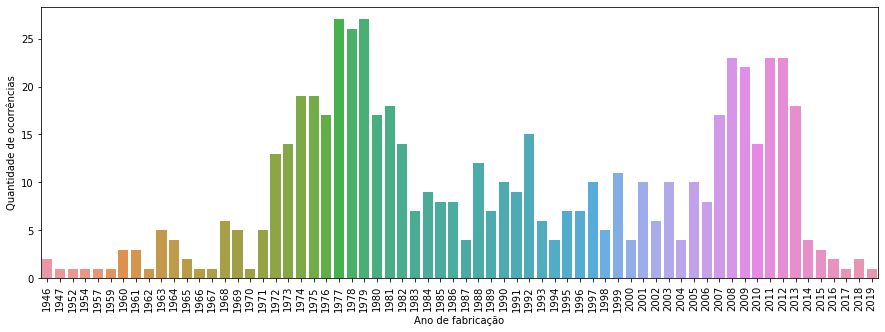

In [139]:
plt.figure(figsize=(15,5))

sns.barplot(data=df_merged.loc[df_merged['ocorrencia_tipo_categoria']=='FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO MOTOR EM VOO', ['codigo_ocorrencia1', 'aeronave_ano_fabricacao']].groupby(['aeronave_ano_fabricacao']).nunique().sort_values(by='aeronave_ano_fabricacao').rename(columns={'codigo_ocorrencia1':'número_de_ocorrências'}).reset_index(),
            x='aeronave_ano_fabricacao',y='número_de_ocorrências')

plt.xlabel('Ano de fabricação')
plt.ylabel('Quantidade de ocorrências')

plt.xticks(rotation = 90);

<b>Hipótese 2:</b> Quantidade de ocorrências provenientes de falhas no motor devem diminuir ao longo dos anos

R: Embora perceba-se uma queda iniciada do ano de 2013 durando até 2017 houve uma ascendente entre os anos de 2018 a 2020, havendo uma nova queda em 2021. Dessa forma a hipótese é parcialmente válida.

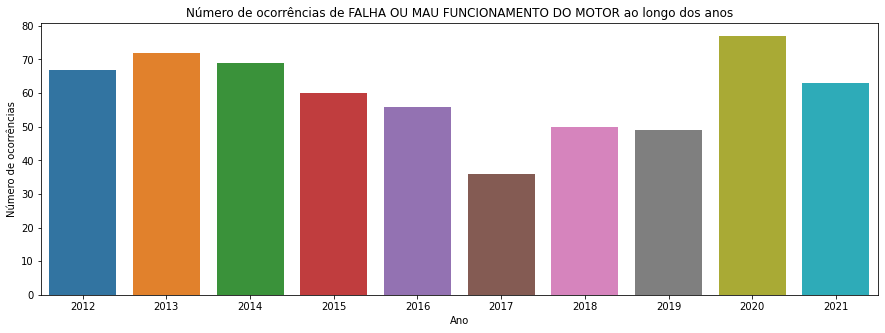

In [140]:
# Quantidade de ocorrências provenientes de falhas no motor devem diminuir ao longo dos anos

plt.figure(figsize=(15,5))

sns.barplot(data=df_merged.loc[df_merged['ocorrencia_tipo_categoria']=='FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO MOTOR EM VOO', ['codigo_ocorrencia1', 'ocorrencia_ano']].groupby(['ocorrencia_ano']).nunique().sort_index().reset_index().rename(columns={'codigo_ocorrencia1':'num_de_ocorrencias'}),
            x='ocorrencia_ano',
            y='num_de_ocorrencias')

plt.xlabel('Ano')
plt.ylabel('Número de ocorrências')
plt.title('Número de ocorrências de FALHA OU MAU FUNCIONAMENTO DO MOTOR ao longo dos anos');

<b>Hipótese 3:</b> Ocorrências causadas por fenômeno meteorológico no solo são mais frequentes do que quando causado por fenômeno meteorológico em vôo

R: O gráfico abaixo mostra que as ocorrências associadas a fenômenos meteorológicos no solo são menos frequentes do que quando associadas a fenômenos meteorológicos em vôo. Portanto essa afirmação não pode ser confirmada.

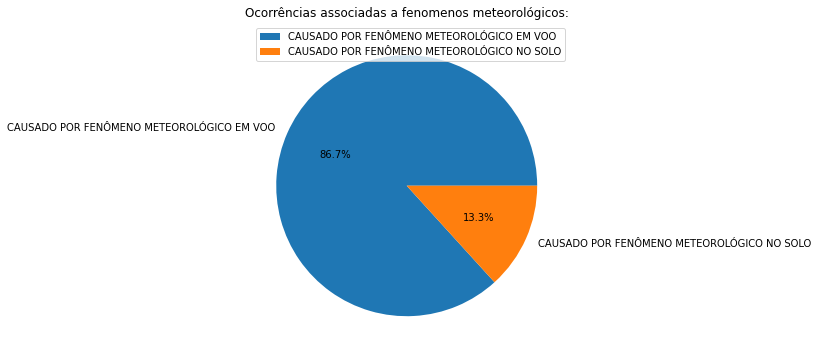

In [171]:
df_merged.loc[df_merged['ocorrencia_tipo'].isin(['CAUSADO POR FENÔMENO METEOROLÓGICO EM VOO',
                                                 'CAUSADO POR FENÔMENO METEOROLÓGICO NO SOLO']),['ocorrencia_tipo','codigo_ocorrencia1']].groupby('ocorrencia_tipo').nunique().plot(kind='pie',
                                                                                                                                                     subplots=True,
                                                                                                                                                     label="",
                                                                                                                                                     figsize=(6, 6),
                                                                                                                                                     autopct='%1.1f%%')
plt.ylabel('')
plt.title('Ocorrências associadas a fenomenos meteorológicos:');

In [167]:
df_merged.loc[df_merged['ocorrencia_tipo'].isin(['CAUSADO POR FENÔMENO METEOROLÓGICO EM VOO',
                                                 'CAUSADO POR FENÔMENO METEOROLÓGICO NO SOLO']),['ocorrencia_tipo','codigo_ocorrencia1']].groupby('ocorrencia_tipo').nunique()

,codigo_ocorrencia1
ocorrencia_tipo,
CAUSADO POR FENÔMENO METEOROLÓGICO EM VOO,72
CAUSADO POR FENÔMENO METEOROLÓGICO NO SOLO,11


<b>Hipótese 4:</b> 'COLISÃO DE AERONAVES EM VOO' geram mais 'aeronave_fatalidades_total' em média

R: Muitas das colisões de aeronaves em vôo não resultaram em fatalidades, dessa forma a média ficou inferior a 0. Quando comparamos a média de fatalidades onde não há colisão de aeronaves em vôo podemos perceber um valor inferior para esse caso. Portanto a hipótese é verdadeira. 

In [90]:
print('Média de fatalidades em colisões de aeronaves em vôo:')

print(df_merged.loc[(df_merged['ocorrencia_tipo']=='COLISÃO DE AERONAVES EM VOO'),
                      'aeronave_fatalidades_total'].mean())


print('\nMédia de fatalidades em nas demais situações:')

print(df_merged.loc[(df_merged['ocorrencia_tipo']!='COLISÃO DE AERONAVES EM VOO'),
                      'aeronave_fatalidades_total'].mean())

Média de fatalidades em colisões de aeronaves em vôo:
0.45454545454545453

Média de fatalidades em nas demais situações:
0.3836849885768042


<b>Hipótese 5:</b> 'ocorrencia_tipo_categoria' de 'GERENCIAMENTO DE TRÁFEGO AÉREO (ATM) / SERVIÇO DE COMUNICAÇÃO NAVEGAÇÃO, OU VIGILÂNCIA (CNS)' em Guarulhos seriam menos frequêntes do que em outros aeroportos (supondo que esse tipo de ocorrência tenha relação com a infraestrutura do aeroporto e supondo que o aeroporto de Guarulhos seja o melhor em termos de infraestrutura).

R: A tabela abaixo mostra que o número de ocorrências da categoria 'GERENCIAMENTO DE TRÁFEGO AÉREO (ATM) / SERVIÇO DE COMUNICAÇÃO NAVEGAÇÃO, OU VIGILÂNCIA (CNS)' é extremamente baixo, presente em apenas alguns poucos aeroportos e não tem relação com algum aeroporto em específico. Dessa forma a hipótese acima não pode ser sustentada.

In [142]:
df_merged.loc[(df_merged['ocorrencia_tipo_categoria']=='GERENCIAMENTO DE TRÁFEGO AÉREO (ATM) / SERVIÇO DE COMUNICAÇÃO NAVEGAÇÃO, OU VIGILÂNCIA (CNS)'),
              ['ocorrencia_cidade','codigo_ocorrencia1']].groupby('ocorrencia_cidade').nunique().rename(columns={'codigo_ocorrencia1':'num_ocorrências'})

,num_ocorrências
ocorrencia_cidade,
BLUMENAU,1
FLORIANÓPOLIS,1
GUARULHOS,1
PORTO ALEGRE,1
SÃO CARLOS,1
SÃO PAULO,1


<b>Hipótese 6:</b> Ocorrências fator_area provenientes de 'FATOR HUMANO' devem apresentar um comportamento aleatório ao longo dos anos.

R: O gráfico abaixo mostra nos primeiros anos de registro os valores mais altos de ocorrências relacionadas a fatores humanos ao passo que é possível observar uma queda nos últimos anos, dessa forma a hipótese de que ocorrências desse tipo são aleatórias ao longo dos anos não pode ser confirmada.

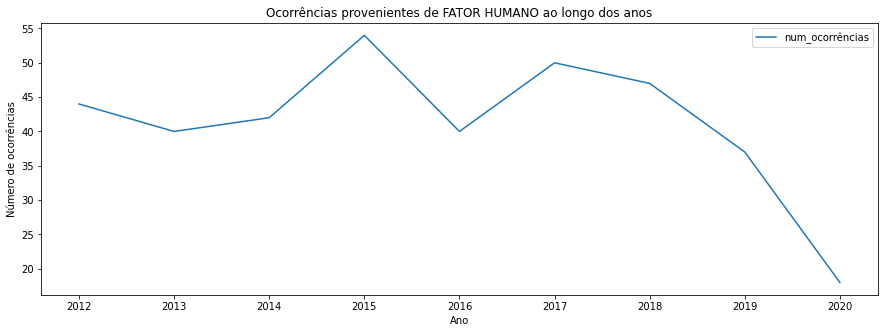

In [143]:
df_merged.loc[df_merged['fator_area']=='FATOR HUMANO',
              ['ocorrencia_ano','codigo_ocorrencia1']].groupby('ocorrencia_ano').nunique().rename(columns={'codigo_ocorrencia1':
                                                                                                         'num_ocorrências'}).plot(figsize=(15,5))
plt.xlabel('Ano')
plt.ylabel('Número de ocorrências')
plt.title('Ocorrências provenientes de FATOR HUMANO ao longo dos anos');

<b>Hipótese 7:</b> Considerando a definição Acidente e Incidente de trabalho presentes em https://www.zielengenharia.com/single-post/diferen%C3%A7a-entre-acidente-e-incidente-do-trabalho o acidente é o evento causador de dano ou lesão, enquanto que o incidente é o evento potencial causador de um acidente.

Dessa forma a hipótese devantada é a de que a proporção Acidentes/Incidentes deve ser baixa, significando que os incidentes são mais presentes ao longo dos anos.

R: O gráfico abaixo mostra o oposto da afirmação presente na hipótese. Os eventos de Acidente são mais frequentes aos longo dos anos em relação aos demais enquanto que Incidentes graves são menos frequêntes. A afirmação portanto não se sustenta embora seja importante conhecer a definição de acidente e incidente empregada no dataset avaliado. Adicionalmente é possível que há uma tendência de queda nos Acidentes ao longo dos anos.

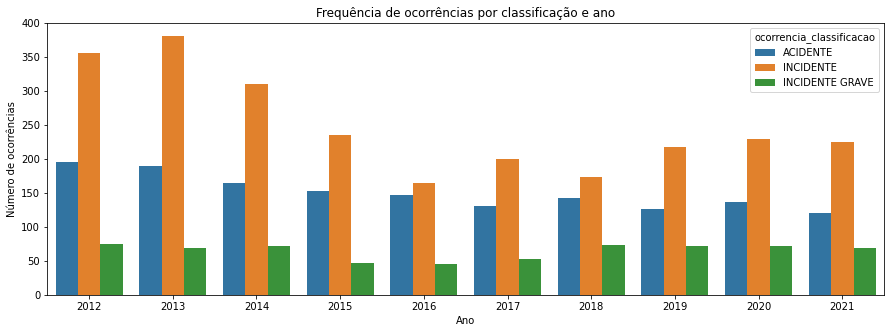

In [144]:
plt.figure(figsize=(15,5))

sns.barplot(data=df_merged[['ocorrencia_ano','ocorrencia_classificacao','codigo_ocorrencia1']].groupby(['ocorrencia_ano','ocorrencia_classificacao']).nunique().rename(columns={'codigo_ocorrencia1':'num_ocorrências'}).reset_index(),
            x='ocorrencia_ano', y='num_ocorrências', hue='ocorrencia_classificacao')

plt.ylabel('Número de ocorrências')
plt.xlabel('Ano')

plt.title('Frequência de ocorrências por classificação e ano');

<b>Hipótese 8:</b> Aeronave com o tipo de operação ('aeronave_tipo_operacao') 'PRIVADA' estaria associada a maior quantidade de fatalidades.

R: É possível observar no gráfico de barras abaixo que as operações do tipo 'PRIVADA' são responsáveis pelo maior número de eventos onde houveram fatalidades.

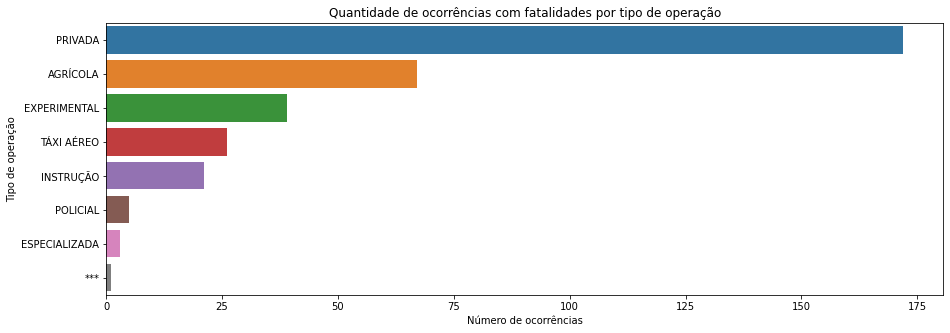

In [145]:
plt.figure(figsize=(15,5))

sns.barplot(data=df_merged.loc[(df_merged['aeronave_fatalidades_total']!=0), ['aeronave_tipo_operacao', 'codigo_ocorrencia1']].groupby('aeronave_tipo_operacao').nunique().rename(columns={'codigo_ocorrencia1':'num_ocorrências'}).sort_values(by='num_ocorrências', ascending=False).reset_index(),
            x='num_ocorrências', y='aeronave_tipo_operacao')


plt.ylabel('Tipo de operação')
plt.xlabel('Número de ocorrências')
plt.title('Quantidade de ocorrências com fatalidades por tipo de operação');


<b>Hipótese 9:</b> Decolagem e pouso seriam responsáveis pela maioria das ocorrências.

R: Observando o gráfico de barras abaixo onde é mostrado as 10 fases de operação com maior frequência de ocorrências registradas é possível notar que pouso e decolagem são responsáveis pela maioria delas, dessa forma a hipótese levantada pode ser confirmada.

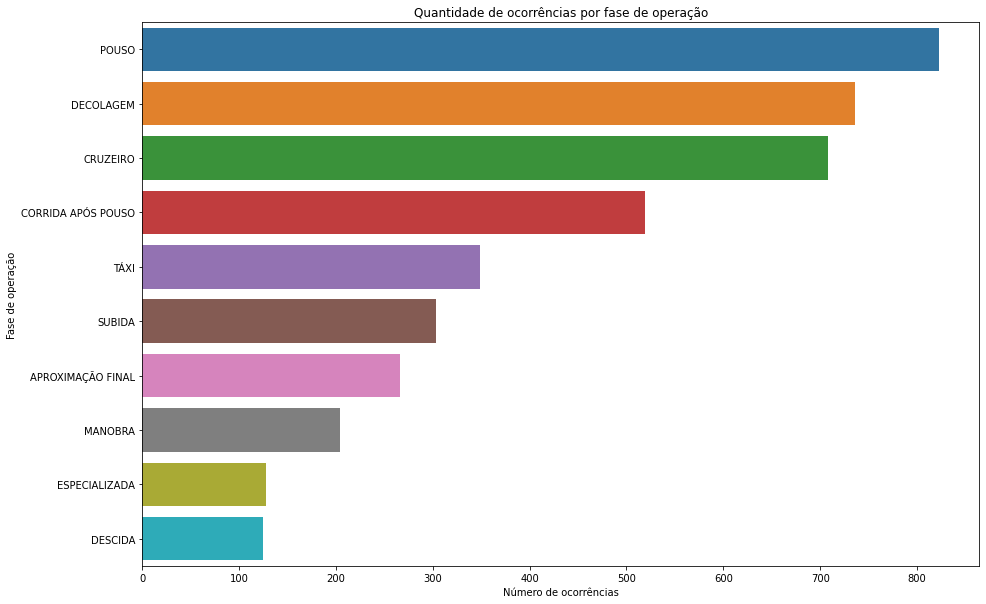

In [146]:
plt.figure(figsize=(15,10))

sns.barplot(data=df_merged[['aeronave_fase_operacao','codigo_ocorrencia1']].groupby('aeronave_fase_operacao').nunique().rename(columns={'codigo_ocorrencia1':'num_ocorrências'}).sort_values(by='num_ocorrências', ascending=False).reset_index().head(10),
            x='num_ocorrências',y='aeronave_fase_operacao')


plt.ylabel('Fase de operação')
plt.xlabel('Número de ocorrências')
plt.title('Quantidade de ocorrências por fase de operação');

In [37]:
tabela_aeronave['aeronave_fase_operacao'].unique()

array(['DESCIDA', 'DECOLAGEM', 'ESPECIALIZADA', 'CORRIDA APÓS POUSO',
       'CRUZEIRO', 'POUSO', 'SUBIDA', 'CIRCUITO DE TRÁFEGO',
       'INDETERMINADA', 'MANOBRA', 'ESTACIONAMENTO', 'ARREMETIDA NO SOLO',
       'OUTRA FASE', 'APROXIMAÇÃO FINAL', 'VOO A BAIXA ALTURA', 'TÁXI',
       'ARREMETIDA NO AR', 'OPERAÇÃO DE SOLO', 'PARTIDA DO MOTOR',
       'ESPERA', 'PAIRADO', 'RETA FINAL', 'CHEQUE DE MOTOR OU ROTOR',
       'DECOLAGEM VERTICAL', 'PROCEDIMENTO DE APROXIMAÇÃO IFR',
       'PUSHBACK', 'SAÍDA IFR', 'DESCIDA DESCONTROLADA',
       'MUDANÇA DE NÍVEL OU ALTITUDE', 'EMPREGO MILITAR',
       'DESCIDA DE EMERGÊNCIA', '***'], dtype=object)

In [63]:
df_merged['ocorrencia_tipo'].unique()

array(['COM PESSOAL EM VOO', 'PERDA DE CONTROLE NO SOLO',
       'FALHA DO MOTOR EM VOO', 'ESTOURO DE PNEU',
       'OPERAÇÃO A BAIXA ALTITUDE', 'PERDA DE CONTROLE EM VOO',
       'EXCURSÃO DE PISTA', 'COM TREM DE POUSO', 'FOGO EM VOO',
       'DESCOMPRESSÃO NÃO INTENCIONAL / EXPLOSIVA',
       'PERDA DE COMPONENTE EM VOO',
       'COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO',
       'POUSO BRUSCO', 'POUSO SEM TREM', 'COM ROTOR',
       'DESORIENTAÇÃO ESPACIAL', 'PANE SECA',
       'FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE',
       'COM COMANDOS DE VOO', 'CORTANTE DE VENTO / TEMPESTADE',
       'TRÁFEGO AÉREO', 'COLISÃO COM AVE',
       'COLISÃO COM OBSTÁCULOS NO SOLO', 'POUSO LONGO',
       'FUMAÇA NA CABINE', 'POUSO EM LOCAL NÃO PREVISTO', 'F.O.D.',
       'OUTROS', 'ALARME FALSO DE FOGO OU DE SUPERAQUECIMENTO',
       'VAZAMENTO DE OUTROS FLUIDOS', 'SOPRO DE REATOR',
       'CAUSADO POR FENÔMENO METEOROLÓGICO EM VOO',
       'PROBLEMAS FISIOLÓGICOS', 'COM TRANSPORTE 

In [32]:
df_merged

,codigo_ocorrencia1,ocorrencia_tipo,ocorrencia_tipo_categoria,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_dia,aeronave_operador_categoria,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_registro_segmento,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,total_aeronaves_envolvidas,fator_nome,fator_aspecto,fator_condicionante,fator_area,ocorrencia_dia_do_mes,ocorrencia_mes_do_ano,ocorrencia_semana_do_ano,ocorrencia_ano
0,45331,COM PESSOAL EM VOO,OUTROS | COM PESSOAL EM VOO,ACIDENTE,GUARULHOS,SP,2012-06-01,***,***,AVIÃO,AEROSPATIALE AND ALENIA,TURBOÉLICE,BIMOTOR,REGULAR,50,2001,BRASIL,FORA DE AERODROMO,FORA DE AERODROMO,DESCIDA,REGULAR,NENHUM,0,1,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,1,6,22,2012
1,45331,COM PESSOAL EM VOO,OUTROS | COM PESSOAL EM VOO,ACIDENTE,GUARULHOS,SP,2012-06-01,***,***,AVIÃO,AEROSPATIALE AND ALENIA,TURBOÉLICE,BIMOTOR,REGULAR,50,2001,BRASIL,FORA DE AERODROMO,FORA DE AERODROMO,DESCIDA,REGULAR,NENHUM,0,1,ATENÇÃO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO,1,6,22,2012
2,45331,COM PESSOAL EM VOO,OUTROS | COM PESSOAL EM VOO,ACIDENTE,GUARULHOS,SP,2012-06-01,***,***,AVIÃO,AEROSPATIALE AND ALENIA,TURBOÉLICE,BIMOTOR,REGULAR,50,2001,BRASIL,FORA DE AERODROMO,FORA DE AERODROMO,DESCIDA,REGULAR,NENHUM,0,1,CAPACITAÇÃO E TREINAMENTO,ASPECTO PSICOLÓGICO,ORGANIZACIONAL,FATOR HUMANO,1,6,22,2012
3,45331,COM PESSOAL EM VOO,OUTROS | COM PESSOAL EM VOO,ACIDENTE,GUARULHOS,SP,2012-06-01,***,***,AVIÃO,AEROSPATIALE AND ALENIA,TURBOÉLICE,BIMOTOR,REGULAR,50,2001,BRASIL,FORA DE AERODROMO,FORA DE AERODROMO,DESCIDA,REGULAR,NENHUM,0,1,CLIMA ORGANIZACIONAL,ASPECTO PSICOLÓGICO,ORGANIZACIONAL,FATOR HUMANO,1,6,22,2012
4,45331,COM PESSOAL EM VOO,OUTROS | COM PESSOAL EM VOO,ACIDENTE,GUARULHOS,SP,2012-06-01,***,***,AVIÃO,AEROSPATIALE AND ALENIA,TURBOÉLICE,BIMOTOR,REGULAR,50,2001,BRASIL,FORA DE AERODROMO,FORA DE AERODROMO,DESCIDA,REGULAR,NENHUM,0,1,COMUNICAÇÃO,ASPECTO PSICOLÓGICO,PSICOSSOCIAL,FATOR HUMANO,1,6,22,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8134,80461,COM TREM DE POUSO,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,INCIDENTE,MARINGÁ,PR,2021-12-24,***,***,AVIÃO,AEROSPATIALE AND ALENIA,TURBOÉLICE,BIMOTOR,REGULAR,75,2013,BRASIL,SÍLVIO NAME JÚNIOR,AFONSO PENA,DECOLAGEM,REGULAR,NENHUM,0,1,NaN,NaN,NaN,NaN,24,12,51,2021
8135,80463,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,INCIDENTE,MARINGÁ,PR,2021-12-28,***,***,AVIÃO,CIRRUS DESIGN,PISTÃO,MONOMOTOR,PARTICULAR,4,2004,BRASIL,ANGRA DOS REIS,SÍLVIO NAME JÚNIOR,CRUZEIRO,PRIVADA,NENHUM,0,1,NaN,NaN,NaN,NaN,28,12,52,2021
8137,80467,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,INCIDENTE,PETROLINA,PE,2021-12-31,***,***,AVIÃO,BOEING COMPANY,JATO,BIMOTOR,REGULAR,199,2013,BRASIL,ORLANDO BEZERRA DE MENEZES,GOVERNADOR ANDRÉ FRANCO MONTORO,SUBIDA,REGULAR,LEVE,0,1,NaN,NaN,NaN,NaN,31,12,52,2021
8138,80468,OPERAÇÕES NO SOLO,OPERAÇÕES NO SOLO,INCIDENTE,SALVADOR,BA,2021-12-26,***,***,AVIÃO,BOEING COMPANY,JATO,BIMOTOR,REGULAR,153,2004,BRASIL,SANTOS DUMONT,DEPUTADO LUÍS EDUARDO MAGALHÃES,TÁXI,REGULAR,NENHUM,0,2,NaN,NaN,NaN,NaN,26,12,51,2021


## <font color="gray"> 2.3 Exploração geral</font>

<b>1:</b> Qual modelo de aeronave apresenta o maior número de ocorrências de falha do motor em voo?

R: Nos eventos de 'FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO MOTOR EM VOO' a fabricante CESSNA AIRCRAFT está presente em 185 ocorrências, o que corresponde a um pouco mais de 22% de eventos dessa natureza.

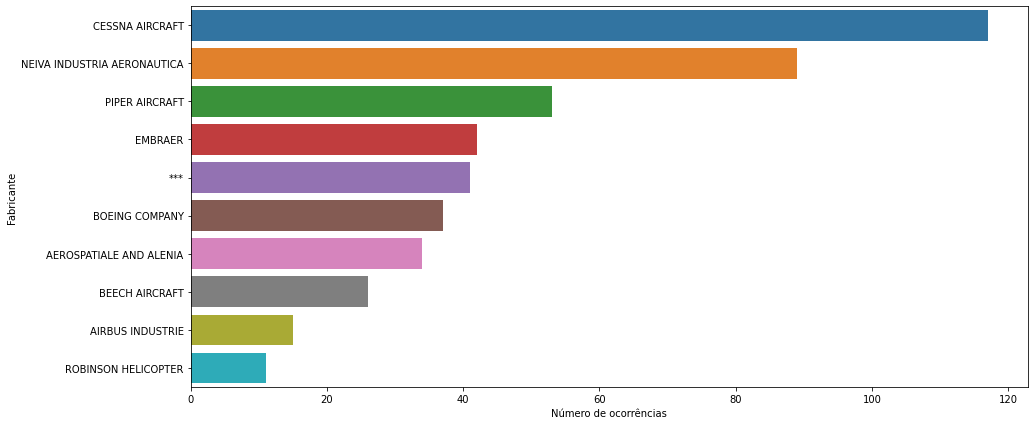

In [147]:
plt.figure(figsize=(15,7))

sns.barplot(data=df_merged.loc[df_merged['ocorrencia_tipo_categoria']=='FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO MOTOR EM VOO', ['codigo_ocorrencia1', 'aeronave_fabricante']].groupby(['aeronave_fabricante']).nunique().sort_values(by='codigo_ocorrencia1', ascending=False).rename(columns={'codigo_ocorrencia1':'número_de_ocorrências'}).head(10).reset_index(),
            y='aeronave_fabricante',x='número_de_ocorrências')

plt.xlabel('Número de ocorrências')
plt.ylabel('Fabricante');

In [148]:
print('Número de ocorrências de falha do motor por fabricante:')

df_merged.loc[df_merged['ocorrencia_tipo_categoria']=='FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO MOTOR EM VOO', ['codigo_ocorrencia1', 'aeronave_fabricante']].groupby(['aeronave_fabricante']).nunique().sort_values(by='codigo_ocorrencia1', ascending=False).rename(columns={'codigo_ocorrencia1':'número_de_ocorrências'})

Número de ocorrências de falha do motor por fabricante:


,número_de_ocorrências
aeronave_fabricante,
CESSNA AIRCRAFT,117
NEIVA INDUSTRIA AERONAUTICA,89
PIPER AIRCRAFT,53
EMBRAER,42
***,41
...,...
HOTEL CHAMA LTDA ME,1
IVAN MOLCHAN,1
JOHN SEELY,1


<b>2:</b> Qual época do ano existem mais ocorrências do tipo 'CAUSADO POR FENÔMENO METEOROLÓGICO EM VOO'?

R: Percebe-se que o primeiro trimestre do ano é o período que acumula o maior número de ocorrências causadas por fenômeno meteorológico em vôo. A maior quantidade de chuvas em parte desse período pode explicar em parte esse comportamento já que na maioria dos demais trimestres do ano a quantidade de chuvas é menor.

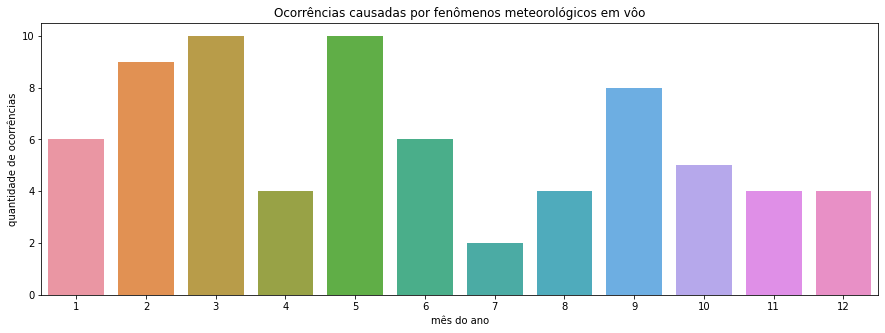

In [151]:
# Qual época do ano existem mais ocorrências do tipo 'CAUSADO POR FENÔMENO METEOROLÓGICO EM VOO'?

# Gráfico de barras ou de linhas

plt.figure(figsize=(15,5))

sns.barplot(x='ocorrencia_mes_do_ano',y='codigo_ocorrencia1',
            data=df_merged.loc[df_merged['ocorrencia_tipo']=='CAUSADO POR FENÔMENO METEOROLÓGICO EM VOO',['codigo_ocorrencia1','ocorrencia_mes_do_ano']].groupby('ocorrencia_mes_do_ano').nunique().reset_index())

plt.ylabel('quantidade de ocorrências')

plt.xlabel('mês do ano')

plt.title('Ocorrências causadas por fenômenos meteorológicos em vôo');

<b>3:</b> Ocorrências por estado:

R: Como esperado o estado de São Paulo registra o maior número de ocorrências, entretanto nota-se como destaque a grande diferença entre a quantidade de ocorrências registradas em São Paulo em relação a quantidade em outros estados.

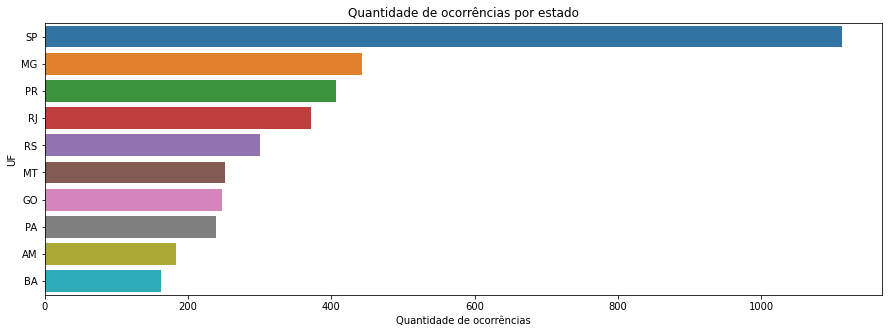

In [152]:
plt.figure(figsize=(15,5))

sns.barplot(data=df_merged[['ocorrencia_uf','codigo_ocorrencia1']].groupby('ocorrencia_uf').nunique().rename(columns={'codigo_ocorrencia1':'qtde_ocorrências'}).sort_values(by='qtde_ocorrências', ascending=False).reset_index().head(10),
            x='qtde_ocorrências',
            y='ocorrencia_uf')

plt.ylabel('UF')
plt.xlabel('Quantidade de ocorrências')
plt.title('Quantidade de ocorrências por estado');

<b>4:</b> Ocorrências por cidade:

R: Ao observar por cidade é possível notar que a cidade de São Paulo possui a maior quantidade de registros de ocorrências, seguida do Rio de Janeiro.

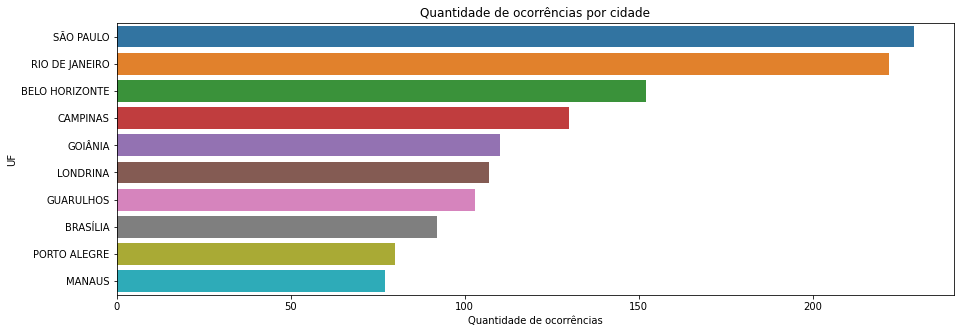

In [153]:
plt.figure(figsize=(15,5))

sns.barplot(data=df_merged[['ocorrencia_cidade','codigo_ocorrencia1']].groupby('ocorrencia_cidade').nunique().rename(columns={'codigo_ocorrencia1':'qtde_ocorrências'}).sort_values(by='qtde_ocorrências', ascending=False).reset_index().head(10),
            x='qtde_ocorrências',
            y='ocorrencia_cidade')

plt.ylabel('UF')
plt.xlabel('Quantidade de ocorrências')
plt.title('Quantidade de ocorrências por cidade');

<b>5:</b> Ocorrências por tipo de motor:

R: Ao investigar ocorrências de diferentes classificações para diferentes tipos de motor nota-se que o motor do tipo pistão tem a maior quantidade de registros. Além disso nota-se também que a proporção de acidentes em relação aos outros tipos de ocorrências para o pistão é bem maior quando comparado aos outros motores.

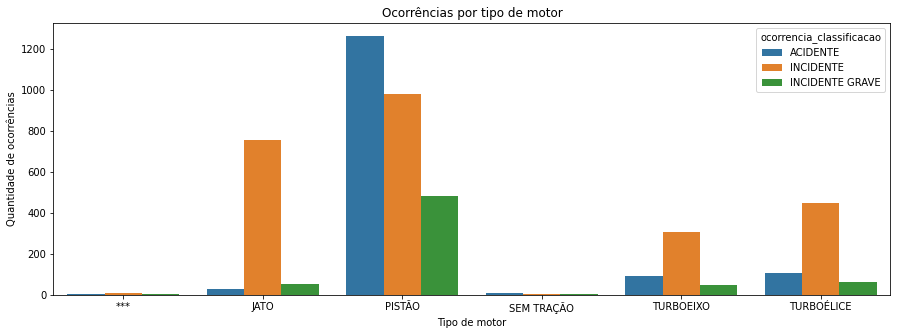

In [156]:
plt.figure(figsize=(15,5))

sns.barplot(data=df_merged[['aeronave_motor_tipo','ocorrencia_classificacao','codigo_ocorrencia1']].groupby(['aeronave_motor_tipo','ocorrencia_classificacao']).nunique().reset_index().rename(columns={'codigo_ocorrencia1':'qtde_ocorrências'}),
            x='aeronave_motor_tipo', y='qtde_ocorrências', hue='ocorrencia_classificacao')

plt.xlabel('Tipo de motor')
plt.ylabel('Quantidade de ocorrências')
plt.title('Ocorrências por tipo de motor');

<b>6:</b> Ocorrências por quantidade de motor:

R: Bimotor apresenta a maior quantidade de ocorrências do tipo Incidente. Já para os demais tipos de ocorrência o monomotor registra a maior quantidade de eventos.

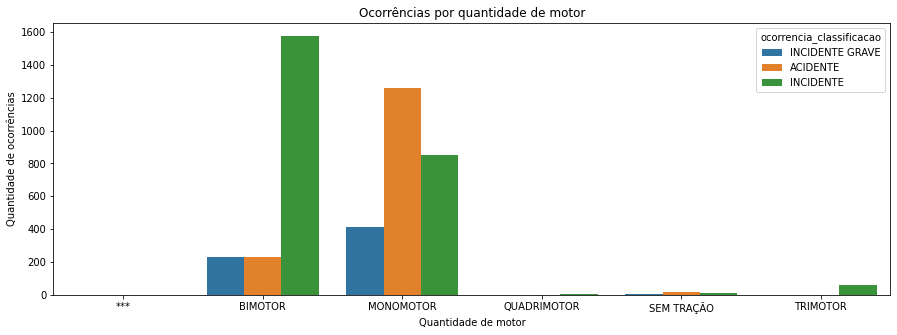

In [157]:
plt.figure(figsize=(15,5))

sns.barplot(data=df_merged[['aeronave_motor_quantidade','ocorrencia_classificacao','codigo_ocorrencia1']].groupby(['aeronave_motor_quantidade','ocorrencia_classificacao']).nunique().reset_index().rename(columns={'codigo_ocorrencia1':'qtde_ocorrências'}),
            x='aeronave_motor_quantidade', y='qtde_ocorrências', hue='ocorrencia_classificacao')

plt.xlabel('Quantidade de motor')
plt.ylabel('Quantidade de ocorrências')
plt.title('Ocorrências por quantidade de motor');

<b>7:</b> Ocorrências por ano:

R: Nota-se que a quantidade de ocorrências nos três primeiros anos da base (2012, 2013, 2014) é maior quando comparado aos demais anos.

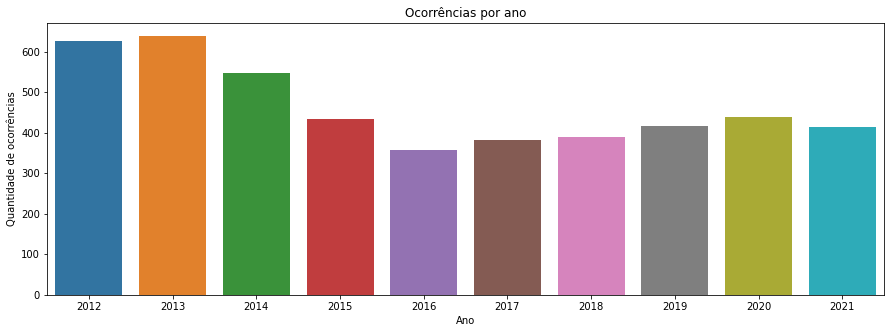

In [173]:
plt.figure(figsize=(15,5))

sns.barplot(data=df_merged[['ocorrencia_ano','codigo_ocorrencia1']].groupby(['ocorrencia_ano']).nunique().reset_index().rename(columns={'codigo_ocorrencia1':'qtde_ocorrências'}),
            x='ocorrencia_ano', y='qtde_ocorrências')

plt.xlabel('Ano')
plt.ylabel('Quantidade de ocorrências')
plt.title('Ocorrências por ano');

<b>8:</b> Ocorrências por tipo de aeronave:

R: O gráfico abaixo mostra que o maior número de ocorrências é atribuído a aeronaves do tipo avião.

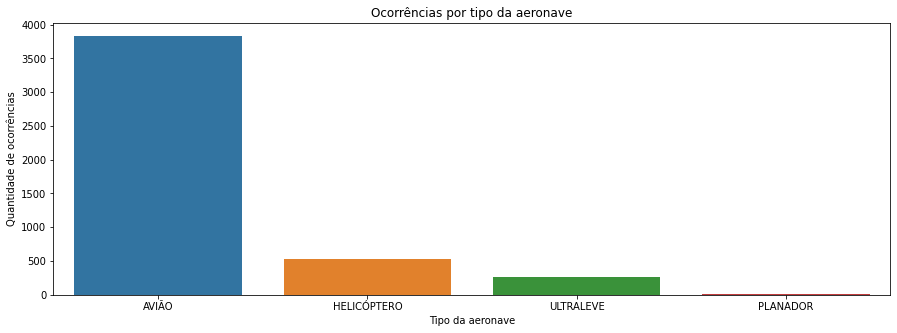

In [178]:
plt.figure(figsize=(15,5))

sns.barplot(data=df_merged[['aeronave_tipo_veiculo','codigo_ocorrencia1']].groupby(['aeronave_tipo_veiculo']).nunique().reset_index().rename(columns={'codigo_ocorrencia1':'qtde_ocorrências'}).sort_values(by='qtde_ocorrências', ascending=False).head(4),
            x='aeronave_tipo_veiculo', y='qtde_ocorrências')

plt.xlabel('Tipo da aeronave')
plt.ylabel('Quantidade de ocorrências')
plt.title('Ocorrências por tipo da aeronave');

In [176]:
df_merged[['aeronave_tipo_veiculo','codigo_ocorrencia1']].groupby(['aeronave_tipo_veiculo']).nunique().reset_index().rename(columns={'codigo_ocorrencia1':'qtde_ocorrências'}).sort_values(by='qtde_ocorrências', ascending=False)

,aeronave_tipo_veiculo,qtde_ocorrências
2,AVIÃO,3831
4,HELICÓPTERO,533
7,ULTRALEVE,260
6,PLANADOR,16
1,ANFÍBIO,10
0,***,7
3,BALÃO,1
5,HIDROAVIÃO,1


In [ ]:
# Verificar a quantidade de ocorrências por itinerário

In [117]:
df_merged['aeronave_motor_tipo'].unique()

array(['TURBOÉLICE', 'PISTÃO', 'JATO', 'TURBOEIXO', 'SEM TRAÇÃO', '***'],
      dtype=object)

In [101]:
df_merged

,codigo_ocorrencia1,ocorrencia_tipo,ocorrencia_tipo_categoria,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_dia,aeronave_operador_categoria,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_registro_segmento,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,total_aeronaves_envolvidas,fator_nome,fator_aspecto,fator_condicionante,fator_area,ocorrencia_dia_do_mes,ocorrencia_mes_do_ano,ocorrencia_semana_do_ano,ocorrencia_ano
0,45331,COM PESSOAL EM VOO,OUTROS | COM PESSOAL EM VOO,ACIDENTE,GUARULHOS,SP,2012-06-01,***,***,AVIÃO,AEROSPATIALE AND ALENIA,TURBOÉLICE,BIMOTOR,REGULAR,50,2001,BRASIL,FORA DE AERODROMO,FORA DE AERODROMO,DESCIDA,REGULAR,NENHUM,0,1,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,1,6,22,2012
1,45331,COM PESSOAL EM VOO,OUTROS | COM PESSOAL EM VOO,ACIDENTE,GUARULHOS,SP,2012-06-01,***,***,AVIÃO,AEROSPATIALE AND ALENIA,TURBOÉLICE,BIMOTOR,REGULAR,50,2001,BRASIL,FORA DE AERODROMO,FORA DE AERODROMO,DESCIDA,REGULAR,NENHUM,0,1,ATENÇÃO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO,1,6,22,2012
2,45331,COM PESSOAL EM VOO,OUTROS | COM PESSOAL EM VOO,ACIDENTE,GUARULHOS,SP,2012-06-01,***,***,AVIÃO,AEROSPATIALE AND ALENIA,TURBOÉLICE,BIMOTOR,REGULAR,50,2001,BRASIL,FORA DE AERODROMO,FORA DE AERODROMO,DESCIDA,REGULAR,NENHUM,0,1,CAPACITAÇÃO E TREINAMENTO,ASPECTO PSICOLÓGICO,ORGANIZACIONAL,FATOR HUMANO,1,6,22,2012
3,45331,COM PESSOAL EM VOO,OUTROS | COM PESSOAL EM VOO,ACIDENTE,GUARULHOS,SP,2012-06-01,***,***,AVIÃO,AEROSPATIALE AND ALENIA,TURBOÉLICE,BIMOTOR,REGULAR,50,2001,BRASIL,FORA DE AERODROMO,FORA DE AERODROMO,DESCIDA,REGULAR,NENHUM,0,1,CLIMA ORGANIZACIONAL,ASPECTO PSICOLÓGICO,ORGANIZACIONAL,FATOR HUMANO,1,6,22,2012
4,45331,COM PESSOAL EM VOO,OUTROS | COM PESSOAL EM VOO,ACIDENTE,GUARULHOS,SP,2012-06-01,***,***,AVIÃO,AEROSPATIALE AND ALENIA,TURBOÉLICE,BIMOTOR,REGULAR,50,2001,BRASIL,FORA DE AERODROMO,FORA DE AERODROMO,DESCIDA,REGULAR,NENHUM,0,1,COMUNICAÇÃO,ASPECTO PSICOLÓGICO,PSICOSSOCIAL,FATOR HUMANO,1,6,22,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8134,80461,COM TREM DE POUSO,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,INCIDENTE,MARINGÁ,PR,2021-12-24,***,***,AVIÃO,AEROSPATIALE AND ALENIA,TURBOÉLICE,BIMOTOR,REGULAR,75,2013,BRASIL,SÍLVIO NAME JÚNIOR,AFONSO PENA,DECOLAGEM,REGULAR,NENHUM,0,1,NaN,NaN,NaN,NaN,24,12,51,2021
8135,80463,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,INCIDENTE,MARINGÁ,PR,2021-12-28,***,***,AVIÃO,CIRRUS DESIGN,PISTÃO,MONOMOTOR,PARTICULAR,4,2004,BRASIL,ANGRA DOS REIS,SÍLVIO NAME JÚNIOR,CRUZEIRO,PRIVADA,NENHUM,0,1,NaN,NaN,NaN,NaN,28,12,52,2021
8137,80467,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,INCIDENTE,PETROLINA,PE,2021-12-31,***,***,AVIÃO,BOEING COMPANY,JATO,BIMOTOR,REGULAR,199,2013,BRASIL,ORLANDO BEZERRA DE MENEZES,GOVERNADOR ANDRÉ FRANCO MONTORO,SUBIDA,REGULAR,LEVE,0,1,NaN,NaN,NaN,NaN,31,12,52,2021
8138,80468,OPERAÇÕES NO SOLO,OPERAÇÕES NO SOLO,INCIDENTE,SALVADOR,BA,2021-12-26,***,***,AVIÃO,BOEING COMPANY,JATO,BIMOTOR,REGULAR,153,2004,BRASIL,SANTOS DUMONT,DEPUTADO LUÍS EDUARDO MAGALHÃES,TÁXI,REGULAR,NENHUM,0,2,NaN,NaN,NaN,NaN,26,12,51,2021
